# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

## Exploratory Data Analysis 

In [13]:
df = pd.read_csv('data/Advertising.csv')
df

,Unnamed: 0,TV,radio,newpaper,sales
0,0,230.1,37.8,6s9.2,22100.0
1,1,44.5,39.3,45.1,10400.0
2,2,17.2,45.9,69.3,9300.0
3,3,151.5,41.3,58.5,18500.0
4,4,180.8,10.8,58.4,12900.0
...,...,...,...,...,...
195,195,38.2,3.7,13.8,7600.0
196,196,94.2,4.9,8.1,9700.0
197,197,177.0,9.3,6.4,12800.0
198,198,283.6,42.0,66.2,25500.0


In [15]:
df.drop(0, axis=0, inplace=True)

In [19]:
df.drop(columns="Unnamed: 0", inplace=True)

In [30]:
df

,TV,radio,newpaper,sales
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
5,8.7,48.9,75.0,7200.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [33]:
df["newpaper"]=df["newpaper"].apply(pd.to_numeric).astype("float64")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 1 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        199 non-null    float64
 1   radio     199 non-null    float64
 2   newpaper  199 non-null    float64
 3   sales     199 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [45]:
df.describe()


,TV,radio,newpaper,sales
count,199.000000,199.000000,199.000000,199.000000
mean,146.625126,23.190955,30.359799,13981.909548
std,85.867111,14.848182,21.659246,5198.861022
min,0.700000,0.000000,0.300000,1600.000000
25%,74.050000,9.950000,12.700000,10350.000000
50%,149.700000,22.500000,25.600000,12900.000000
75%,218.450000,36.400000,44.700000,17350.000000
max,296.400000,49.600000,114.000000,27000.000000


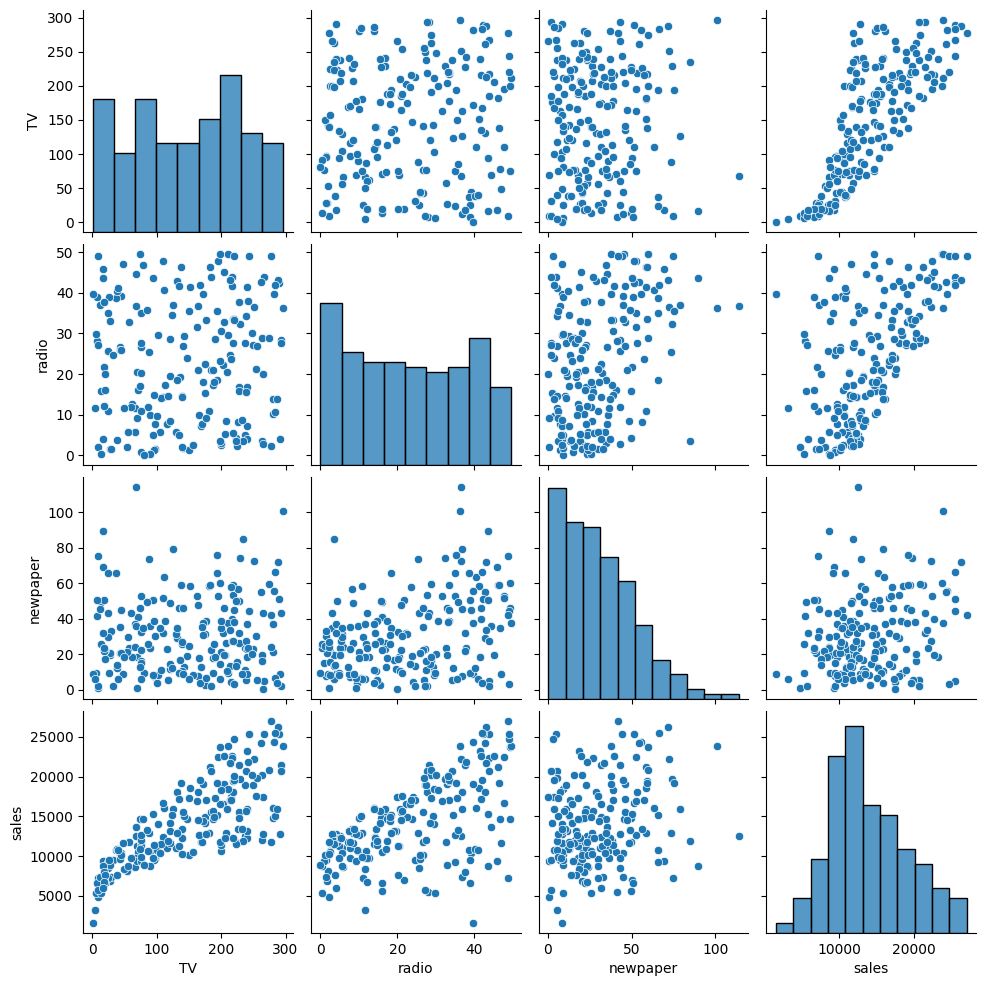

In [35]:
sns.pairplot(df)

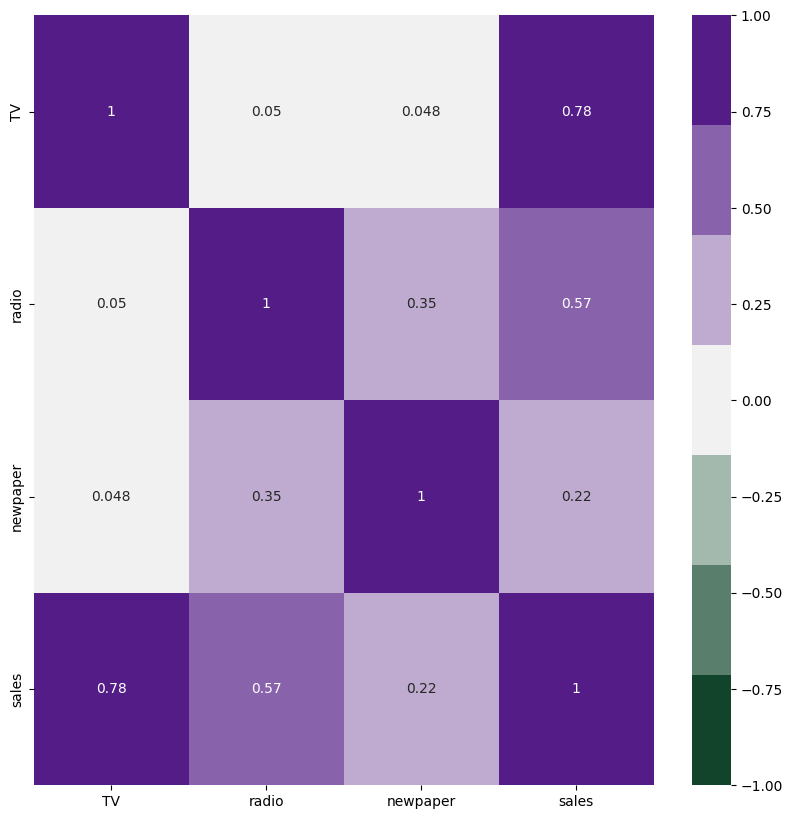

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

## Modelado

In [37]:
x = df.drop("sales", axis=1)
y = df["sales"]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 3)
(40, 3)
(159,)
(40,)


In [49]:
# Linea de regresion

lr = linear_model.LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(x_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(x_test)))
print("Train RMSE:", metrics.root_mean_squared_error(y_train, lr.predict(x_train)))
print("Test RMSE:", metrics.root_mean_squared_error(y_test, lr.predict(x_test)))

Train MSE: 2872614.923945353
Test MSE: 2520107.84015061
Train RMSE: 1694.8790292954104
Test RMSE: 1587.48475273012


In [59]:
# Polynomial

from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2) # le decimos que es de grado 2. Polinomio 2
poly_feats.fit(x)
X_poly = poly_feats.transform(x)
X_poly

array([[1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       [1.00000e+00, 1.51500e+02, 4.13000e+01, ..., 1.70569e+03,
        2.41605e+03, 3.42225e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]], shape=(199, 10))

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_poly, y, test_size = 0.20, random_state = 42)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 10)
(40, 10)
(159,)
(40,)


In [62]:
lr_2 = linear_model.LinearRegression()
lr_2.fit(x_train, y_train)




LinearRegression()

In [ ]:
y_pred = lr_2.predict(x_test)

print("Train MSE:", metrics.mean_squared_error(y_train, lr_2.predict(x_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr_2.predict(x_test)))
print("Train RMSE:", metrics.root_mean_squared_error(y_train, lr_2.predict(x_train)))
print("Test RMSE:", metrics.root_mean_squared_error(y_test, lr_2.predict(x_test)))

Train MSE: 375169.7781501895
Test MSE: 392368.4905963643
Train RMSE: 612.5110432883554
Test RMSE: 626.393239583861


In [116]:
# Regularizacion

from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 15556.761439304722)
ridgeR.fit(x_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr_2.predict(x_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr_2.predict(x_test)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(x_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(x_test)),2))

Train MSE sin regularización: 375169.78
Test MSE sin regularización: 392368.49
Train MSE con regularización: 424888.67
Test MSE con regularización: 355129.78


In [103]:
n_alphas = 100
alphas = np.logspace(0, 5, n_alphas)

coef_ridge = []
err_ridge = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(x_test)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)

In [104]:
min(err_ridge)

355129.77504445985

In [105]:
best_idx = np.argmin(err_ridge)
best_idx


np.int64(83)

In [106]:
best_alpha = alphas[best_idx]
best_alpha

np.float64(15556.761439304722)

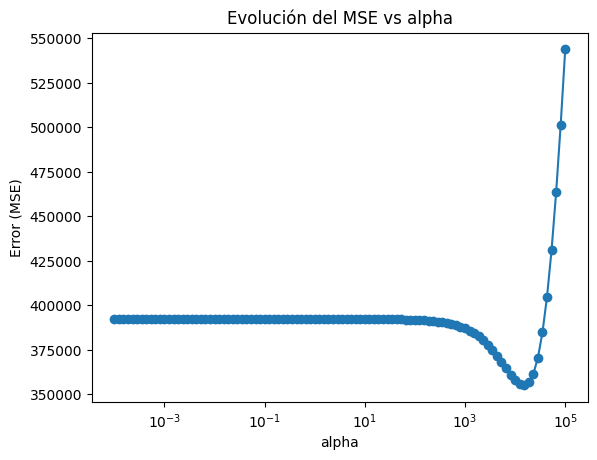

In [90]:
import matplotlib.pyplot as plt

plt.plot(alphas, err_ridge, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Error (MSE)')
plt.title('Evolución del MSE vs alpha')
plt.show()


In [115]:
# Regularizacion

from sklearn.linear_model import Lasso

lassoR = Lasso(alpha = 3853.5285937105273)
lassoR.fit(x_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr_2.predict(x_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr_2.predict(x_test)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, lassoR.predict(x_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, lassoR.predict(x_test)),2))

Train MSE sin regularización: 375169.78
Test MSE sin regularización: 392368.49
Train MSE con regularización: 424304.0
Test MSE con regularización: 346018.11


In [107]:
n_alphas = 100
alphas = np.logspace(0, 5, n_alphas)

coef_lasso = []
err_lasso = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(x_test)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_lasso.append(lasso_error)

In [108]:
min(err_lasso)

346018.11161359574

In [109]:
best_idx = np.argmin(err_lasso)
best_idx

np.int64(71)

In [110]:
best_alpha = alphas[best_idx]
best_alpha

np.float64(3853.5285937105273)

In [129]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 3853.5285937105273, l1_ratio = 1)
elastic_net.fit(x_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(x_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(x_test)))

Train MSE: 424303.9984
Test MSE: 346018.1116


In [117]:
n_alphas = 100
alphas = np.logspace(0, 5, n_alphas)

coef_eln = []
err_eln = []

for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=1)
    elastic_net.fit(x_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(x_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)

In [118]:
min(err_eln)

346018.11161359574

In [119]:
best_idx = np.argmin(err_eln)
best_idx

np.int64(71)

In [120]:
best_alpha = alphas[best_idx]
best_alpha

np.float64(3853.5285937105273)

In [128]:
n_l1_ratio = 100
l1_ratio_opt = range(0, 1,n_l1_ratio )

coef_l1 = []
err_l1 = []

for a in l1_ratio_opt:
    elastic_net = ElasticNet(alpha =3853.5285937105273 , l1_ratio=a)
    elastic_net.fit(x_train, y_train)
    coef_l1.append(elastic_net.coef_)
    y_pred = elastic_net.predict(x_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_l1.append(elasticnet_error)

c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+08, tolerance: 4.512e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [125]:
min(err_l1)

890289.5952047314

In [126]:
best_idx = np.argmin(err_l1)
best_idx

np.int64(0)

In [127]:
best_alpha = alphas[best_idx]
best_alpha

np.float64(1.0)

# (Explicación contaminación entre train y test)

## Resultados